In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\jansk\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 50)                0

In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
943/943 [==============================] - 3s 2ms/step - loss: 0.4202 - accuracy: 0.8001 - val_loss: 0.6632 - val_accuracy: 0.7855
Epoch 2/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8166 - val_loss: 0.5533 - val_accuracy: 0.7596
Epoch 3/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3690 - accuracy: 0.8214 - val_loss: 0.4995 - val_accuracy: 0.7622
Epoch 4/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3668 - accuracy: 0.8205 - val_loss: 0.5252 - val_accuracy: 0.7743
Epoch 5/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3613 - accuracy: 0.8243 - val_loss: 0.4695 - val_accuracy: 0.7732
Epoch 6/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3615 - accuracy: 0.8275 - val_loss: 0.5103 - val_accuracy: 0.7665
Epoch 7/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3618 - accuracy: 0.8275 - val_loss: 0.4717 - val_accuracy: 0.7750

Epoch 58/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3247 - accuracy: 0.8453 - val_loss: 0.5224 - val_accuracy: 0.7621
Epoch 59/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3260 - accuracy: 0.8479 - val_loss: 0.5289 - val_accuracy: 0.7622
Epoch 60/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3274 - accuracy: 0.8466 - val_loss: 0.4609 - val_accuracy: 0.7734
Epoch 61/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3262 - accuracy: 0.8465 - val_loss: 0.4791 - val_accuracy: 0.7714
Epoch 62/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3251 - accuracy: 0.8479 - val_loss: 0.4747 - val_accuracy: 0.7760
Epoch 63/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3253 - accuracy: 0.8477 - val_loss: 0.4488 - val_accuracy: 0.7760
Epoch 64/100
943/943 [==============================] - 2s 2ms/step - loss: 0.3260 - accuracy: 0.8446 - val_loss: 0.5227 - val_accuracy:

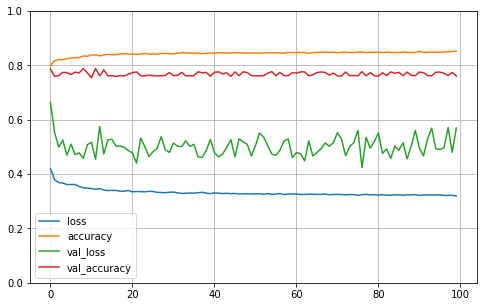

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.5697 - accuracy: 0.7610


[0.5696820020675659, 0.7610225677490234]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=-1) )

0.7543160690571049

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




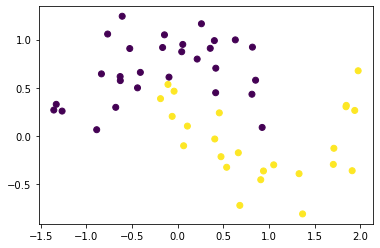

In [13]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [14]:
from keras.callbacks import History


history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(Dense(500,activation="sigmoid"))
model.add(Dense(200,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=1000, callbacks=[history_Adam])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              3000      
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 200)               100200    
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 603,901
Trainable params: 603,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 125ms/step - loss: 0.7102 - accuracy: 0.5283 - val_loss: 0.6718 - val_accuracy: 0.5532
Epoch 2/1000
2/2 [====================

2/2 [==============================] - 0s 23ms/step - loss: 0.1841 - accuracy: 0.9245 - val_loss: 0.4684 - val_accuracy: 0.8298
Epoch 53/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1834 - accuracy: 0.9245 - val_loss: 0.4698 - val_accuracy: 0.8298
Epoch 54/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1803 - accuracy: 0.9245 - val_loss: 0.4639 - val_accuracy: 0.8298
Epoch 55/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1847 - accuracy: 0.9245 - val_loss: 0.4670 - val_accuracy: 0.8298
Epoch 56/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1796 - accuracy: 0.9245 - val_loss: 0.4486 - val_accuracy: 0.8298
Epoch 57/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1758 - accuracy: 0.9245 - val_loss: 0.4462 - val_accuracy: 0.8298
Epoch 58/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1735 - accuracy: 0.9245 - val_loss: 0.4534 - val_accuracy: 0.8298
Epoch 59/1000
2/2 [=

Epoch 110/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0618 - accuracy: 0.9811 - val_loss: 0.2270 - val_accuracy: 0.9149
Epoch 111/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0611 - accuracy: 0.9811 - val_loss: 0.2218 - val_accuracy: 0.9149
Epoch 112/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0571 - accuracy: 0.9811 - val_loss: 0.2006 - val_accuracy: 0.8936
Epoch 113/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0575 - accuracy: 1.0000 - val_loss: 0.1939 - val_accuracy: 0.8936
Epoch 114/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0559 - accuracy: 1.0000 - val_loss: 0.1987 - val_accuracy: 0.9149
Epoch 115/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0516 - accuracy: 1.0000 - val_loss: 0.2044 - val_accuracy: 0.9149
Epoch 116/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 0.2097 - val_accuracy: 0.9149

2/2 [==============================] - 0s 25ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.1941 - val_accuracy: 0.9362
Epoch 168/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0180 - accuracy: 1.0000 - val_loss: 0.1932 - val_accuracy: 0.9362
Epoch 169/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.1887 - val_accuracy: 0.9149
Epoch 170/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.1888 - val_accuracy: 0.9149
Epoch 171/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.1886 - val_accuracy: 0.9149
Epoch 172/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.1911 - val_accuracy: 0.9149
Epoch 173/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.1900 - val_accuracy: 0.9149
Epoch 174/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.2036 - val_accuracy: 0.9149
Epoch 225/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.1980 - val_accuracy: 0.9149
Epoch 226/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.1908 - val_accuracy: 0.9149
Epoch 227/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.9149
Epoch 228/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.1879 - val_accuracy: 0.9149
Epoch 229/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.1897 - val_accuracy: 0.9149
Epoch 230/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.1914 - val_accuracy: 0.9362
Epoch 231/1000

2/2 [==============================] - 0s 32ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.2194 - val_accuracy: 0.8936
Epoch 282/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.2198 - val_accuracy: 0.9149
Epoch 283/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.2149 - val_accuracy: 0.9149
Epoch 284/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.2121 - val_accuracy: 0.9149
Epoch 285/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.2115 - val_accuracy: 0.9149
Epoch 286/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2107 - val_accuracy: 0.9149
Epoch 287/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.2106 - val_accuracy: 0.9149
Epoch 288/1000

2/2 [==============================] - 0s 29ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2239 - val_accuracy: 0.9149
Epoch 339/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2243 - val_accuracy: 0.9149
Epoch 340/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2262 - val_accuracy: 0.9149
Epoch 341/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9149
Epoch 342/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2280 - val_accuracy: 0.9149
Epoch 343/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.2276 - val_accuracy: 0.9149
Epoch 344/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9149
Epoch 345/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2423 - val_accuracy: 0.9149
Epoch 396/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.2409 - val_accuracy: 0.9149
Epoch 397/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9149
Epoch 398/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2397 - val_accuracy: 0.9149
Epoch 399/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2401 - val_accuracy: 0.9149
Epoch 400/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9149
Epoch 401/1000
2/2 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2410 - val_accuracy: 0.9149
Epoch 402/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2523 - val_accuracy: 0.9149
Epoch 453/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2539 - val_accuracy: 0.9149
Epoch 454/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.9149
Epoch 455/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2555 - val_accuracy: 0.9149
Epoch 456/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2562 - val_accuracy: 0.9149
Epoch 457/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2564 - val_accuracy: 0.9149
Epoch 458/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2566 - val_accuracy: 0.9149
Epoch 459/1000

2/2 [==============================] - 0s 24ms/step - loss: 9.5119e-04 - accuracy: 1.0000 - val_loss: 0.2710 - val_accuracy: 0.9149
Epoch 510/1000
2/2 [==============================] - 0s 24ms/step - loss: 9.5276e-04 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.9149
Epoch 511/1000
2/2 [==============================] - 0s 25ms/step - loss: 9.3822e-04 - accuracy: 1.0000 - val_loss: 0.2708 - val_accuracy: 0.9149
Epoch 512/1000
2/2 [==============================] - 0s 27ms/step - loss: 9.2162e-04 - accuracy: 1.0000 - val_loss: 0.2702 - val_accuracy: 0.9149
Epoch 513/1000
2/2 [==============================] - 0s 24ms/step - loss: 9.1718e-04 - accuracy: 1.0000 - val_loss: 0.2700 - val_accuracy: 0.9149
Epoch 514/1000
2/2 [==============================] - 0s 25ms/step - loss: 9.1136e-04 - accuracy: 1.0000 - val_loss: 0.2687 - val_accuracy: 0.9149
Epoch 515/1000
2/2 [==============================] - 0s 25ms/step - loss: 9.2540e-04 - accuracy: 1.0000 - val_loss: 0.2684 - val_acc

Epoch 565/1000
2/2 [==============================] - 0s 32ms/step - loss: 7.1283e-04 - accuracy: 1.0000 - val_loss: 0.2828 - val_accuracy: 0.9149
Epoch 566/1000
2/2 [==============================] - 0s 23ms/step - loss: 7.2800e-04 - accuracy: 1.0000 - val_loss: 0.2834 - val_accuracy: 0.9149
Epoch 567/1000
2/2 [==============================] - 0s 24ms/step - loss: 7.3179e-04 - accuracy: 1.0000 - val_loss: 0.2825 - val_accuracy: 0.9149
Epoch 568/1000
2/2 [==============================] - 0s 22ms/step - loss: 7.2554e-04 - accuracy: 1.0000 - val_loss: 0.2830 - val_accuracy: 0.9149
Epoch 569/1000
2/2 [==============================] - 0s 26ms/step - loss: 7.0855e-04 - accuracy: 1.0000 - val_loss: 0.2827 - val_accuracy: 0.9149
Epoch 570/1000
2/2 [==============================] - 0s 26ms/step - loss: 6.9641e-04 - accuracy: 1.0000 - val_loss: 0.2818 - val_accuracy: 0.9149
Epoch 571/1000
2/2 [==============================] - 0s 26ms/step - loss: 6.9618e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 621/1000
2/2 [==============================] - 0s 23ms/step - loss: 5.9294e-04 - accuracy: 1.0000 - val_loss: 0.2924 - val_accuracy: 0.9149
Epoch 622/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.7259e-04 - accuracy: 1.0000 - val_loss: 0.2941 - val_accuracy: 0.9149
Epoch 623/1000
2/2 [==============================] - 0s 24ms/step - loss: 5.5803e-04 - accuracy: 1.0000 - val_loss: 0.2958 - val_accuracy: 0.9149
Epoch 624/1000
2/2 [==============================] - 0s 26ms/step - loss: 5.5047e-04 - accuracy: 1.0000 - val_loss: 0.2972 - val_accuracy: 0.9149
Epoch 625/1000
2/2 [==============================] - 0s 25ms/step - loss: 5.7570e-04 - accuracy: 1.0000 - val_loss: 0.2983 - val_accuracy: 0.9149
Epoch 626/1000
2/2 [==============================] - 0s 28ms/step - loss: 5.6852e-04 - accuracy: 1.0000 - val_loss: 0.2976 - val_accuracy: 0.9149
Epoch 627/1000
2/2 [==============================] - 0s 26ms/step - loss: 5.4757e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 677/1000
2/2 [==============================] - 0s 33ms/step - loss: 4.5726e-04 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9149
Epoch 678/1000
2/2 [==============================] - 0s 24ms/step - loss: 4.4644e-04 - accuracy: 1.0000 - val_loss: 0.3040 - val_accuracy: 0.9149
Epoch 679/1000
2/2 [==============================] - 0s 23ms/step - loss: 4.4535e-04 - accuracy: 1.0000 - val_loss: 0.3046 - val_accuracy: 0.9149
Epoch 680/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.4222e-04 - accuracy: 1.0000 - val_loss: 0.3053 - val_accuracy: 0.9149
Epoch 681/1000
2/2 [==============================] - 0s 28ms/step - loss: 4.3904e-04 - accuracy: 1.0000 - val_loss: 0.3059 - val_accuracy: 0.9149
Epoch 682/1000
2/2 [==============================] - 0s 32ms/step - loss: 4.3657e-04 - accuracy: 1.0000 - val_loss: 0.3065 - val_accuracy: 0.9149
Epoch 683/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.4027e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 733/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.6188e-04 - accuracy: 1.0000 - val_loss: 0.3177 - val_accuracy: 0.9149
Epoch 734/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.6047e-04 - accuracy: 1.0000 - val_loss: 0.3190 - val_accuracy: 0.9149
Epoch 735/1000
2/2 [==============================] - 0s 26ms/step - loss: 3.6047e-04 - accuracy: 1.0000 - val_loss: 0.3198 - val_accuracy: 0.9149
Epoch 736/1000
2/2 [==============================] - 0s 25ms/step - loss: 3.6055e-04 - accuracy: 1.0000 - val_loss: 0.3211 - val_accuracy: 0.9149
Epoch 737/1000
2/2 [==============================] - 0s 29ms/step - loss: 3.6311e-04 - accuracy: 1.0000 - val_loss: 0.3217 - val_accuracy: 0.9149
Epoch 738/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.6878e-04 - accuracy: 1.0000 - val_loss: 0.3215 - val_accuracy: 0.9149
Epoch 739/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.5968e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 789/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.0345e-04 - accuracy: 1.0000 - val_loss: 0.3275 - val_accuracy: 0.9149
Epoch 790/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.0337e-04 - accuracy: 1.0000 - val_loss: 0.3279 - val_accuracy: 0.9149
Epoch 791/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.0720e-04 - accuracy: 1.0000 - val_loss: 0.3287 - val_accuracy: 0.9149
Epoch 792/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.9811e-04 - accuracy: 1.0000 - val_loss: 0.3290 - val_accuracy: 0.9149
Epoch 793/1000
2/2 [==============================] - 0s 24ms/step - loss: 3.0284e-04 - accuracy: 1.0000 - val_loss: 0.3296 - val_accuracy: 0.9149
Epoch 794/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.9822e-04 - accuracy: 1.0000 - val_loss: 0.3299 - val_accuracy: 0.9149
Epoch 795/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.0238e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 845/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.5197e-04 - accuracy: 1.0000 - val_loss: 0.3411 - val_accuracy: 0.9149
Epoch 846/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.5983e-04 - accuracy: 1.0000 - val_loss: 0.3426 - val_accuracy: 0.9149
Epoch 847/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.5027e-04 - accuracy: 1.0000 - val_loss: 0.3430 - val_accuracy: 0.9149
Epoch 848/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.5429e-04 - accuracy: 1.0000 - val_loss: 0.3433 - val_accuracy: 0.9149
Epoch 849/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.4921e-04 - accuracy: 1.0000 - val_loss: 0.3426 - val_accuracy: 0.9149
Epoch 850/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.5405e-04 - accuracy: 1.0000 - val_loss: 0.3421 - val_accuracy: 0.9149
Epoch 851/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.4634e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 901/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.1338e-04 - accuracy: 1.0000 - val_loss: 0.3544 - val_accuracy: 0.9149
Epoch 902/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.1102e-04 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9149
Epoch 903/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.1031e-04 - accuracy: 1.0000 - val_loss: 0.3561 - val_accuracy: 0.9149
Epoch 904/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.1095e-04 - accuracy: 1.0000 - val_loss: 0.3567 - val_accuracy: 0.9149
Epoch 905/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.1323e-04 - accuracy: 1.0000 - val_loss: 0.3569 - val_accuracy: 0.9149
Epoch 906/1000
2/2 [==============================] - 0s 25ms/step - loss: 2.1153e-04 - accuracy: 1.0000 - val_loss: 0.3573 - val_accuracy: 0.9149
Epoch 907/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1118e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 957/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8178e-04 - accuracy: 1.0000 - val_loss: 0.3643 - val_accuracy: 0.9149
Epoch 958/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8155e-04 - accuracy: 1.0000 - val_loss: 0.3640 - val_accuracy: 0.9149
Epoch 959/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.8545e-04 - accuracy: 1.0000 - val_loss: 0.3640 - val_accuracy: 0.9149
Epoch 960/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.8107e-04 - accuracy: 1.0000 - val_loss: 0.3648 - val_accuracy: 0.9149
Epoch 961/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8467e-04 - accuracy: 1.0000 - val_loss: 0.3658 - val_accuracy: 0.9149
Epoch 962/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.8191e-04 - accuracy: 1.0000 - val_loss: 0.3664 - val_accuracy: 0.9149
Epoch 963/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7804e-04 - accuracy: 1.0000 - val_loss: 0

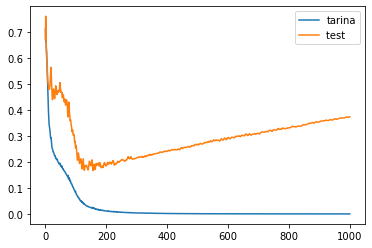

In [15]:
plt.plot(history_Adam.history['loss'], label = "tarina")
plt.plot(history_Adam.history['val_loss'], label = "test ")


plt.legend()
plt.show()

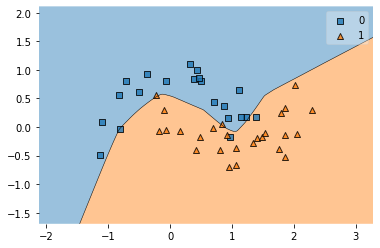

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()

In [ ]:
from mlxtend.plotting import plot_decision_regions